# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [12]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DEMOGRAPHICS.csv to DEMOGRAPHICS.csv
User uploaded file "DEMOGRAPHICS.csv" with length 801643 bytes


In [13]:
df = pd.read_csv('DEMOGRAPHICS.csv')

In [14]:
df.describe

<bound method NDFrame.describe of       index  State_FIPS_Code  County_FIPS_Code CHSI_County_Name  \
0         0                1                 1          Autauga   
1         1                1                 3          Baldwin   
2         2                1                 5          Barbour   
3         3                1                 7             Bibb   
4         4                1                 9           Blount   
...     ...              ...               ...              ...   
3136   3136               56                37       Sweetwater   
3137   3137               56                39            Teton   
3138   3138               56                41            Uinta   
3139   3139               56                43         Washakie   
3140   3140               56                45           Weston   

     CHSI_State_Name CHSI_State_Abbr  Strata_ID_Number  \
0            Alabama              AL                29   
1            Alabama              AL         

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [22]:
unique_values_per_column = df.nunique()

# Find the column with the maximum number of unique values
max_unique_column = unique_values_per_column.idxmax()
max_unique_value_count = unique_values_per_column.max()

# Display the results
print("Number of unique values per column:")
print(unique_values_per_column)

print("\nColumn with the greatest number of distinct values:")
print(f"Column: {max_unique_column}, Unique Values: {max_unique_value_count}")

Number of unique values per column:
index                         3141
State_FIPS_Code                 51
County_FIPS_Code               324
CHSI_County_Name              1847
CHSI_State_Name                 51
CHSI_State_Abbr                 51
Strata_ID_Number                88
Strata_Determining_Factors       4
Number_Counties                 37
Population_Size               3088
Min_Population_Size             88
Max_Population_Size             88
Population_Density             588
Min_Population_Density          55
Max_Population_Density          71
Poverty                        260
Min_Poverty                     64
Max_Poverty                     66
Age_19_Under                   208
Min_Age_19_Under                56
Max_Age_19_Under                60
Age_19_64                      214
Min_Age_19_64                   60
Max_Age_19_65                   54
Age_65_84                      203
Min_Age_65_84                   54
Max_Age_65_85                   57
Age_85_and_Over    

In [23]:
# Exclude ID column
print('Column with next most distinct values:', df.drop(columns='index').nunique().idxmax())

Column with next most distinct values: Population_Size


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [24]:
#  Data Redundancy
print(df.columns[df.nunique() == 1])

Index([], dtype='object')


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

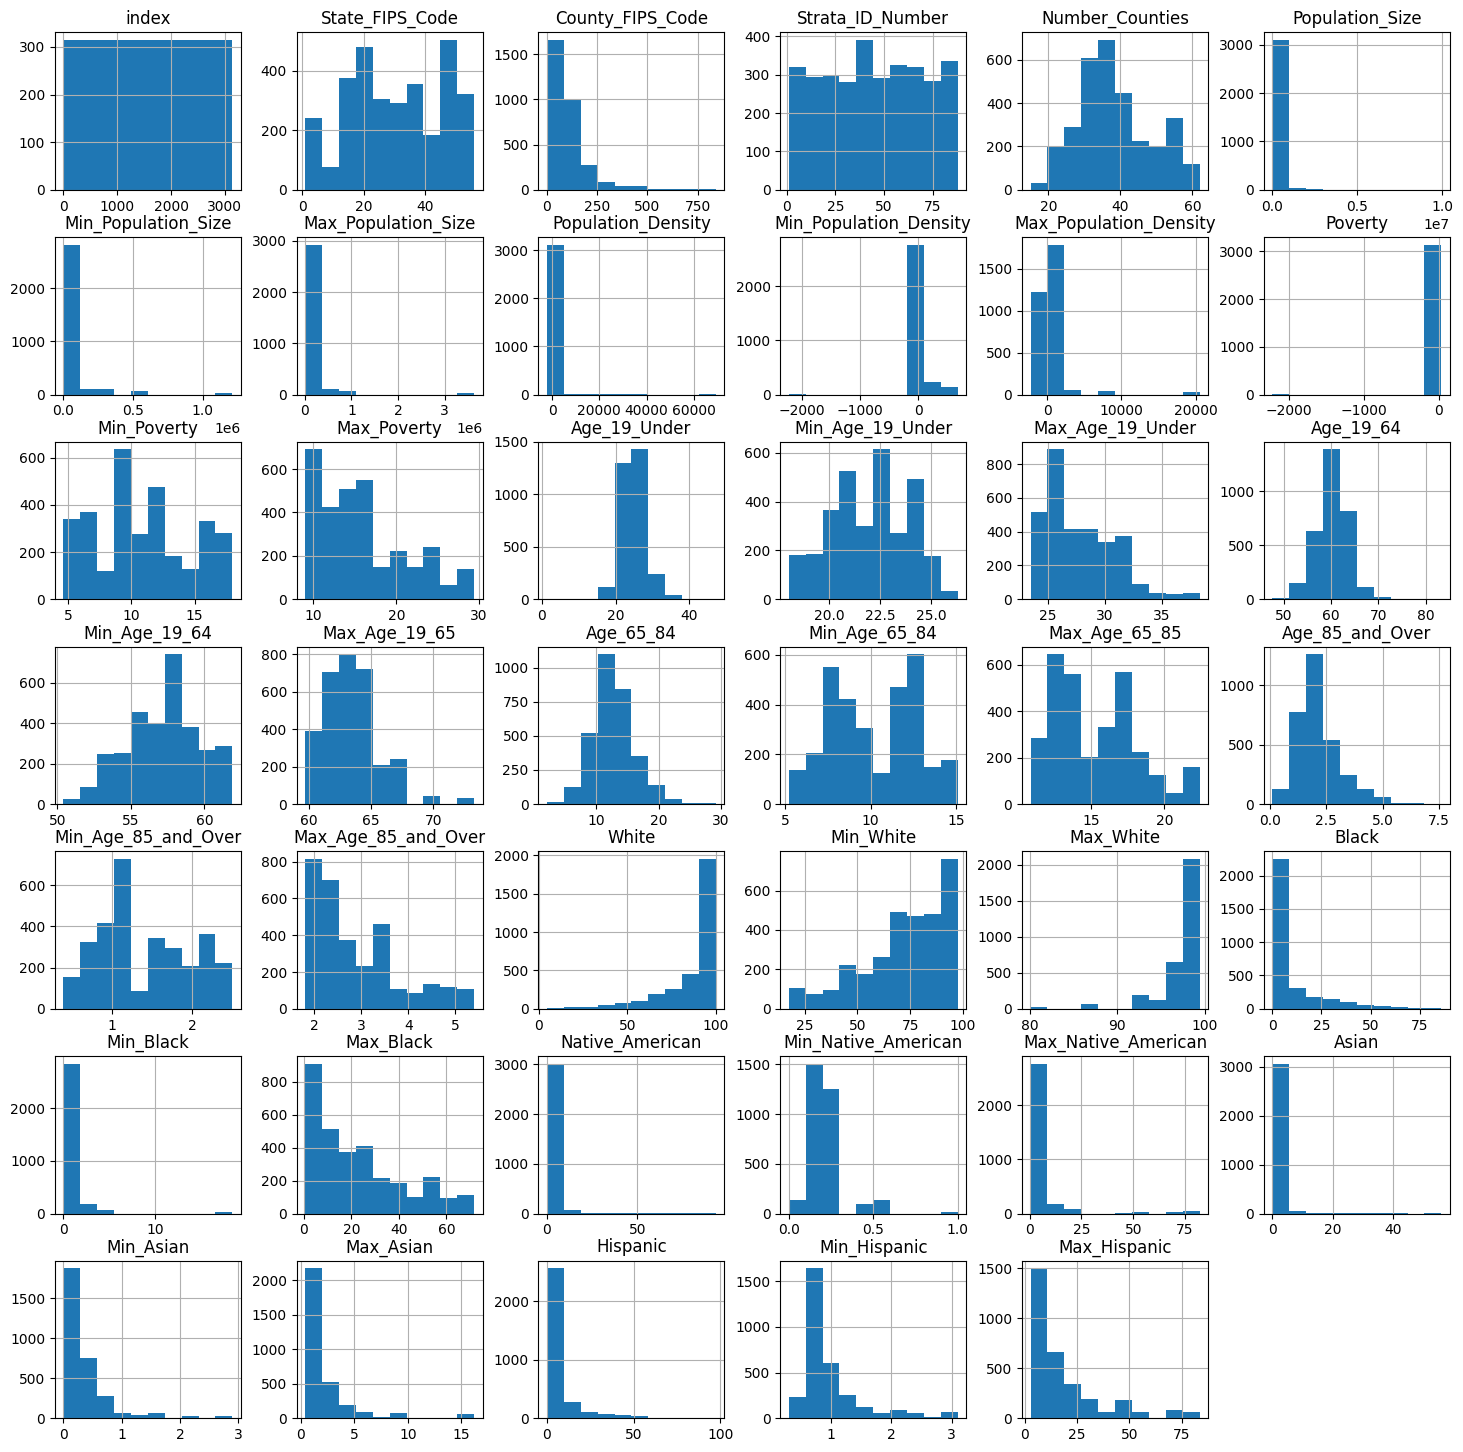

In [38]:
numeric_cols = df.select_dtypes(include=['int', 'float'])
numeric_cols.hist(figsize=(18,18))
plt.show()

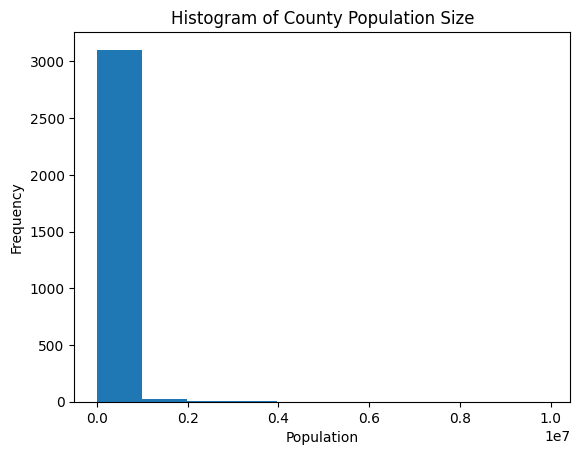

In [26]:
import matplotlib.pyplot as plt
df['Population_Size'].plot.hist()
plt.title('Histogram of County Population Size')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.savefig('population_histogram.png')

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [39]:
df

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,...,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic
0,0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,...,17.3,0.5,0.1,1.1,0.6,0.2,2.2,1.7,0.8,19.2
1,1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,...,14.1,0.5,0.1,1.1,0.4,0.4,3.3,2.3,0.8,13.7
2,2,1,5,Barbour,Alabama,AL,51,"frontier status, population size, poverty, age...",33,28414,...,50.7,0.4,0.2,7.1,0.3,0.2,2.3,3.1,1.0,67.7
3,3,1,7,Bibb,Alabama,AL,42,"frontier status, population size, poverty, age",53,21516,...,35.4,0.3,0.1,2.6,0.1,0.1,1.5,1.4,1.2,46.9
4,4,1,9,Blount,Alabama,AL,28,"frontier status, population size, poverty, age",39,55725,...,20.5,0.5,0.1,0.9,0.2,0.3,2.2,6.3,0.8,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,56,37,Sweetwater,Wyoming,WY,77,"frontier status, population size",15,37975,...,1.6,1.1,1.0,41.5,1.0,0.3,1.5,10.3,2.8,71.5
3137,3137,56,39,Teton,Wyoming,WY,78,"frontier status, population size, poverty, age",43,19032,...,1.6,0.4,0.4,16.2,0.8,0.0,3.2,10.2,1.1,22.6
3138,3138,56,41,Uinta,Wyoming,WY,38,"frontier status, population size, poverty, age",35,19939,...,6.3,1.1,0.2,1.9,0.3,0.2,1.3,5.9,0.6,13.8
3139,3139,56,43,Washakie,Wyoming,WY,82,"frontier status, population size, poverty, age",37,7933,...,0.9,0.8,0.1,2.8,0.7,0.1,0.5,12.1,0.6,15.9


In [30]:
# Correlation between population size and density
print(df[['Population_Size', 'Population_Density']].corr())


                    Population_Size  Population_Density
Population_Size            1.000000            0.335188
Population_Density         0.335188            1.000000


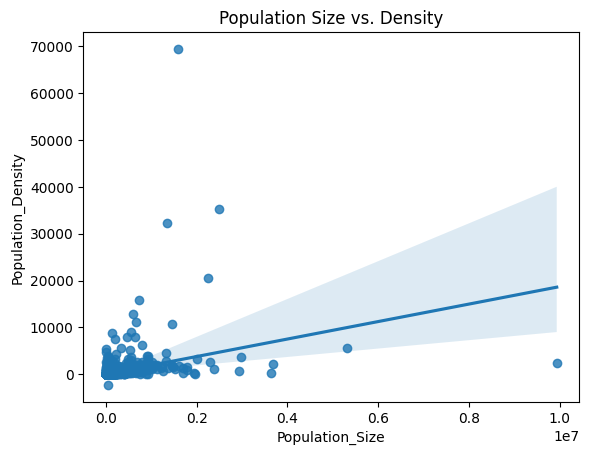

In [41]:
# Scatter plot
import seaborn as sns
sns.regplot(data=df, x='Population_Size', y='Population_Density')
plt.title('Population Size vs. Density')
plt.savefig('population_scatter.png')



---



## Submitting Your Work

Submit your work as usual.